# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import collections
from fastcore.basics import patch
from geography.points import Points

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int, # average number of points
                 r:float,  # connection radius
                 d:int=2, # dimension
                 law = "binomial", # either poisson or binomial
                 shape = None): # convex polytope
        self.n = n
        self.r = r
        self.points = Points(n=n,d=d, law=law, shape=shape).points()
    
    @functools.cached_property
    def distance_matrix(self):
        a = self.points
        diff = a[:,None,:] - a[None,:,:]
        return np.linalg.norm(diff,axis=-1)

    @functools.cached_property
    def adj(self):
        mask = self.distance_matrix < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}

    def n_comp(self):
        def dfs(gr,s):
            for v in gr[s]:
                if v not in self.parent:
                    self.parent[v]=s
                    dfs(gr,v)
                    self.topo.append(v)
        self.parent = {}
        self.topo=[]
        count = 0
        for i in range(self.n):
            if i not in self.parent:
                count+=1
                self.parent[i]=None
                dfs(self.adj,i)
                self.topo.append(i)
        return count
        
    def degree_distribution(self):
        dgr=collections.Counter([len(v) for _,v in self.adj.items()])
        return np.array(list(dgr.items()))

    def cyclic(self):
        for k, lst in self.adj.items():
            for v in lst:
                if k != self.parent[v] and v!=self.parent[k]: 
                    return True
        return False

    def n_tri(self):
        A = (self.distance_matrix<=self.r).astype(np.int64)
        np.fill_diagonal(A,0)
        return np.trace(np.linalg.matrix_power(A,3))//6


In [ ]:
from scipy.spatial import ConvexHull
import seaborn.objects as so

In [ ]:
rgg = RGG(100,0.1, shape=ConvexHull(np.random.default_rng().uniform(0,1,(6,2))))
rgg.distance_matrix

array([[0.        , 0.67486433, 0.61525357, ..., 0.50083593, 0.42693271,
        0.26870193],
       [0.67486433, 0.        , 0.08895937, ..., 0.4987056 , 0.53980588,
        0.41375077],
       [0.61525357, 0.08895937, 0.        , ..., 0.40985845, 0.45140083,
        0.36567411],
       ...,
       [0.50083593, 0.4987056 , 0.40985845, ..., 0.        , 0.08686815,
        0.42487371],
       [0.42693271, 0.53980588, 0.45140083, ..., 0.08686815, 0.        ,
        0.3908553 ],
       [0.26870193, 0.41375077, 0.36567411, ..., 0.42487371, 0.3908553 ,
        0.        ]])

In [ ]:
rgg.adj

{0: [3, 13, 59, 87],
 1: [2, 42, 45, 52, 58],
 2: [1, 20, 23, 42, 45, 52, 58, 68, 79, 84, 96],
 3: [0, 13, 31, 59],
 4: [14, 67, 77, 88, 94],
 5: [19, 36, 49, 76, 85, 89],
 6: [16, 21, 71],
 7: [17, 25, 30, 37, 38, 56, 62, 80, 86, 95],
 8: [12, 27, 36, 41, 60, 63, 65, 93],
 9: [21, 71, 92],
 10: [28, 31, 54, 55, 61, 90],
 11: [26, 34, 53, 67, 77, 88],
 12: [8, 27, 36, 41, 60, 63, 65, 93],
 13: [0, 3, 59],
 14: [4, 43, 77, 88, 94],
 15: [20, 27, 44, 46, 48, 68, 74, 81, 84, 96],
 16: [6, 21, 24, 71],
 17: [7, 25, 33, 62, 73, 86, 91],
 18: [34, 35, 51],
 19: [5, 49, 76, 85, 89],
 20: [2, 15, 42, 48, 58, 68, 79, 81, 84, 96],
 21: [6, 9, 16, 71],
 22: [36, 49, 60, 64, 66, 75, 78, 83],
 23: [2, 24, 44, 45, 52],
 24: [16, 23, 44, 71],
 25: [7, 17, 30, 56, 62, 86, 87, 95],
 26: [11, 29, 40, 53, 72],
 27: [8, 12, 15, 36, 46, 60, 63, 65],
 28: [10, 55, 91],
 29: [26, 37, 38, 40, 50, 53, 72, 80],
 30: [7, 25, 37, 38, 40, 56, 62, 80, 95],
 31: [3, 10, 54, 55, 59, 61, 90],
 32: [39, 41],
 33: [17, 

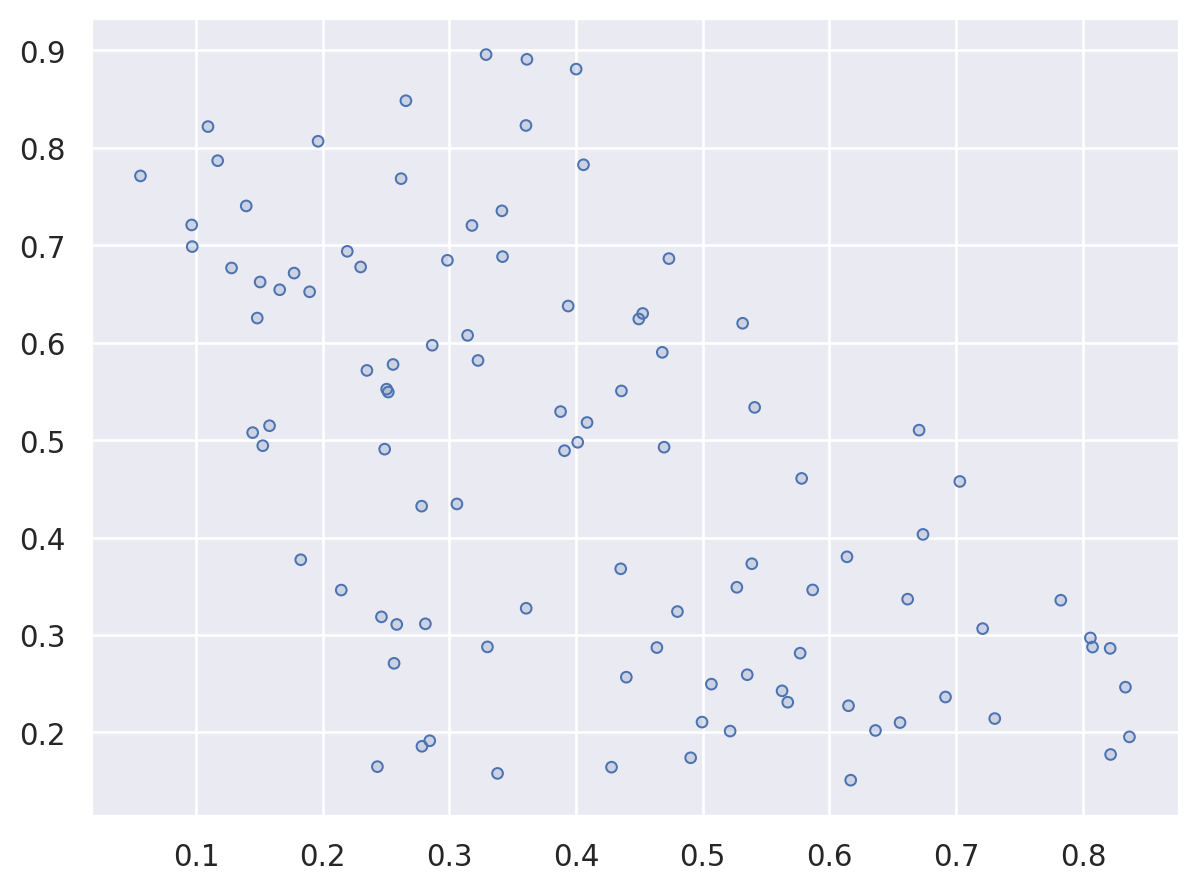

In [ ]:

p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.n_comp()

1

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 4, 14],
       [ 5, 17],
       [11,  2],
       [ 6, 14],
       [ 3,  8],
       [10,  8],
       [ 8, 14],
       [ 7,  6],
       [ 9, 10],
       [ 2,  5],
       [ 1,  1],
       [12,  1]])

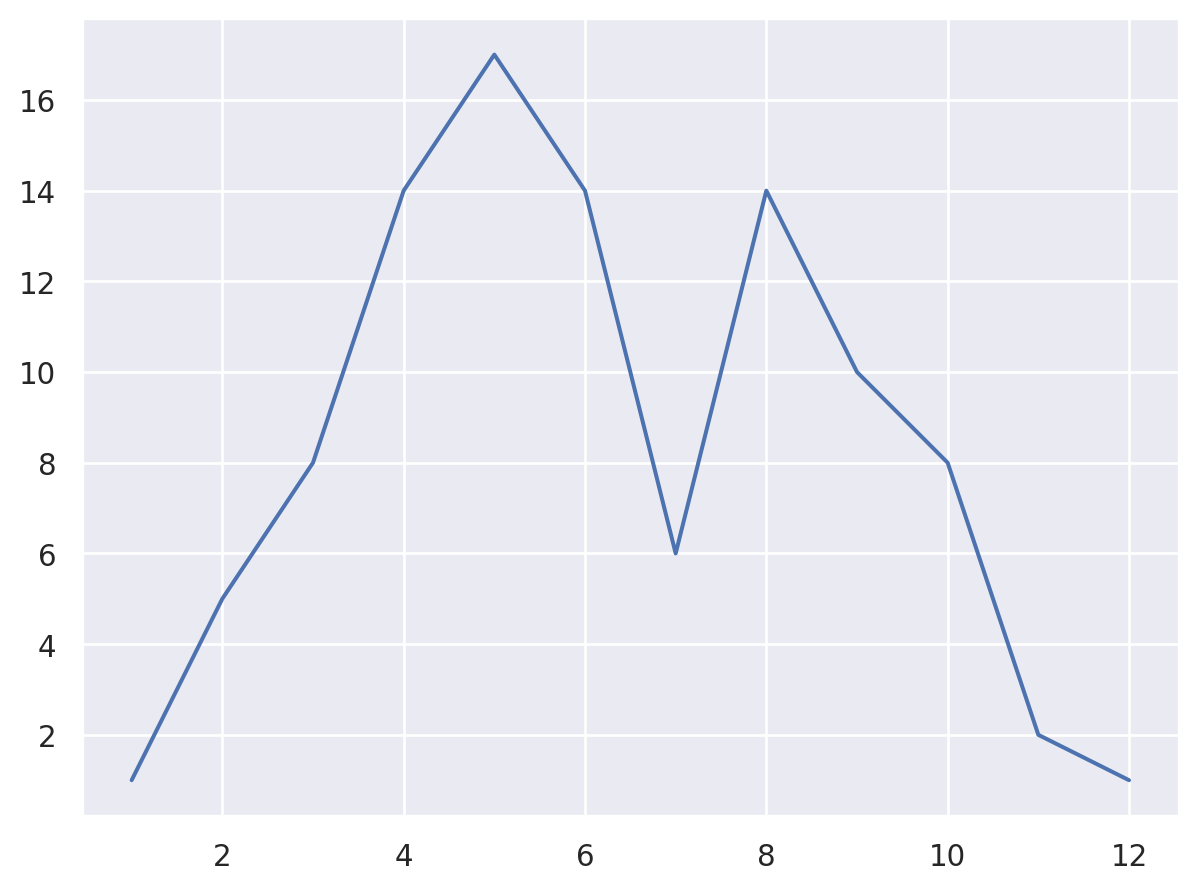

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
rgg.cyclic()

True

In [ ]:
rgg.n_tri()

388

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()